In [1]:
#importamos librerías
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import re
#cargamos y leemos el archivo csv como DataFrame
data_location = 'properatti.csv'

data = pd.read_csv('properatti.csv', encoding='latin1', dtype= str, sep=",")
# Mostramos los 5 primeros registros del df
data.head()


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.6618237,...,40.0,1127.2727272727273,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.9038831,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.6522615,...,55.0,1309.090909090909,1309.090909090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647796899999996,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,3435548.0,"-38.0026256,-57.5494468",-38.0026256,...,35.0,1828.571428571429,1828.571428571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [2]:
#analizamos el tipo de datos de cada columna
data.dtypes

Unnamed: 0                    object
operation                     object
property_type                 object
place_name                    object
place_with_parent_names       object
country_name                  object
state_name                    object
geonames_id                   object
lat-lon                       object
lat                           object
lon                           object
price                         object
currency                      object
price_aprox_local_currency    object
price_aprox_usd               object
surface_total_in_m2           object
surface_covered_in_m2         object
price_usd_per_m2              object
price_per_m2                  object
floor                         object
rooms                         object
expenses                      object
properati_url                 object
description                   object
title                         object
image_thumbnail               object
dtype: object

In [3]:
# Contabilizamos los registros del df
data.shape

(121220, 26)

In [4]:
# Describimos los registros del df
data.describe()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
count,121220,121220,121220,121197,121220,121220,121220,102503,69670,69670,...,101313,68617,87658,7899,47390,14262,121220,121218,121220,118108
unique,121220,1,4,1060,1164,1,28,646,47203,46495,...,995,25569,25185,182,31,982,121220,104055,72705,114389
top,103170,sell,apartment,CÃ³rdoba,|Argentina|Santa Fe|Rosario|,Argentina,Capital Federal,3838574.0,"-34.4026444,-58.6684776",-34.40264439999999,...,40.0,2000.0,2000.0,1.0,3.0,1.0,http://www.properati.com.ar/1bmhl_venta_depart...,AVISO LEGAL: Las descripciones arquitectÃ³nica...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/5/yyMiu8BHQI9KXC...
freq,1,121220,71065,9254,8504,121220,32316,8504,312,312,...,2736,574,892,2080,12567,1028,1,358,4855,255


In [5]:
# Evaluamos el porcentaje de datos nulos por columna
def describe_data(cols: list, data: pd.DataFrame) -> pd.DataFrame:
    
    diccionario = {
        'Null': data.shape[0] - data.count(), 
        '% Null': round((data.shape[0] - data.count()) / data.shape[0] * 100, 3),
        'Types': data.dtypes
    }    
    return pd.DataFrame(index=cols, data=diccionario)

dataset=describe_data(cols=data.columns,data=data)
dataset

,Null,% Null,Types
Unnamed: 0,0,0.000,object
operation,0,0.000,object
property_type,0,0.000,object
place_name,23,0.019,object
place_with_parent_names,0,0.000,object
country_name,0,0.000,object
state_name,0,0.000,object
geonames_id,18717,15.441,object
lat-lon,51550,42.526,object
lat,51550,42.526,object


In [6]:
#modificamos los tipos de datos según la variable 

data['operation'] = data['operation'].astype(str)
data['price_aprox_local_currency'] = data['price_aprox_local_currency'].astype(float)
data['property_type'] = data['property_type'].astype(str)
data['place_name'] = data['place_name'].astype(str)
data['place_with_parent_names'] = data['place_with_parent_names'].astype(str)
data['state_name'] = data['state_name'].astype(str)
data['geonames_id'] = data['geonames_id'].astype(float)
data['lat'] = data['lat'].astype(float)
data['lon']= data['lon'].astype(float)
data['price'] = data['price'].astype(float)
data['currency'] = data['currency'].astype(str) 
data['price_aprox_local_currency'] = data['price_aprox_local_currency'].astype(float) 
data['price_aprox_usd'] = data['price_aprox_usd'].astype(float)
data['surface_total_in_m2'] = data['surface_total_in_m2'].astype(float)
data['surface_covered_in_m2'] = data['surface_covered_in_m2'].astype(float)
data['price_usd_per_m2'] = data['price_usd_per_m2'].astype(float)
data['price_per_m2'] = data['price_per_m2'].astype(float)
data['properati_url'] = data['properati_url'].astype(str)
data['description'] = data['description'].astype(str)
data['title'] = data['title'].astype(str)
data['rooms'] = data['rooms'].astype(float)


In [7]:
#chequeamos el cambio de tipo de datos
data.dtypes

Unnamed: 0                     object
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                          object
rooms                         float64
expenses                       object
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [8]:
# La columna "unnamed :0" no brinda mayor información dado que es una columa de números secuenciales
data['Unnamed: 0'].unique()
len(data['Unnamed: 0']) == data.shape[0]

True

In [9]:
#El ejercicio se efectuará sobre los precios de las propiedades en venta (no incluye precios de alquileres)
data.operation.unique()

array(['sell'], dtype=object)

In [10]:
#Se descartaron aquellas variables que no consideramos relevantes ofueron redundantes para el objetivo (“country name”, “image_thumbnall”) y de aquellas que contenían más del 50% de datos nulos (“expenses”, ”floor”) con excepción de la columna ‘rooms’ que es crítica al momento de pricear una propiedad y para la cual se aplicó una estrategia para lidiar con la falta de datos 
data.drop(['expenses', 'image_thumbnail', 'Unnamed: 0','country_name', 'floor', 'operation'], axis=1, inplace=True)

<Figure size 720x432 with 0 Axes>

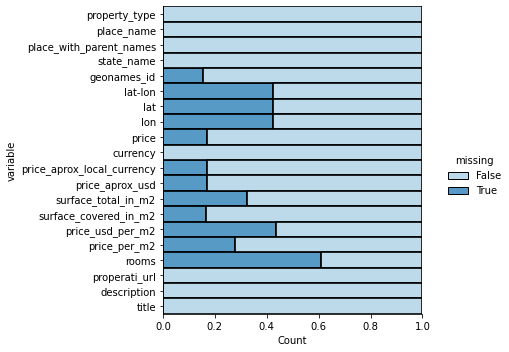

In [11]:
#Graficamos la proporcion de datos nulos en las columnas
plt.figure(figsize=(10,6))
sns.displot(data=data.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25, palette='Paired')

In [12]:
# Chequeamos que no existen registros duplicados tomando como base la columna properati_url
data_duplicada = data.properati_url.duplicated(keep = False)
any(data_duplicada)

False

<AxesSubplot:xlabel='property_type', ylabel='Count'>

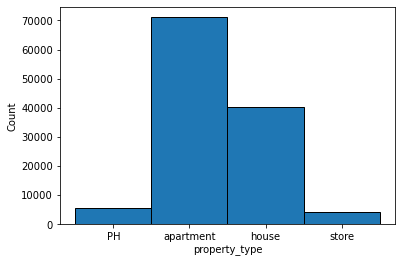

In [13]:
# Observamos mayor presencia relativa de departamentos y casas en venta en relación con PH´s y tiendas
sns.histplot(data.property_type, bins=20, alpha=1, edgecolor = 'black',  linewidth=1)

COMPLETAMOS DATOS FALTANTES 

In [14]:
# Imputación de la variable 'Rooms' definiendo un patrón de búsqueda para encontrar la cantidad de ambientes 
pat_rooms_a = '(?i)((?P<u>((mono)|(1)))|(?P<d>dos)|(?P<t>tres)|(?P<c>cuatro)|(?P<ci>cinco)|(?P<s>seis)|(?P<si>siete)|(?P<o>ocho)|(?P<n>nueve))\s?((amb)|(dor))'
reg_rooms_a = re.compile(pat_rooms_a)


In [15]:
def rooms_a(x):
    
    match = reg_rooms_a.search(x)
    
    if match is not None:
        group = match.group('u','d','t','c','ci','s','si','o','n')        
        for i in range(len(group)):            
            if group[i] is None:
                continue
            else:
                return float(i+1)
        return None

In [16]:
def parse_rooms(row, parse_from_column, parsed_column, recursive = False):
    
    if not np.isnan(row[parsed_column]):
        return row[parsed_column]
    
    lower_text = row[parse_from_column].lower()
    
    # regex
    regex_0 = re.search(r'((monoamb|monoambiente))', lower_text) # 'monoamb'
    regex_1 = re.search(r'(\d+)(\s)(\b(amb))', lower_text) # '2 amb'
    regex_2 = re.search(r'((\b(amb))(\D)(\d+))', lower_text) # ' amb:2'
    regex_3 = re.search(r'(\d+)((amb)\b)', lower_text) # ' 3amb'
    regex_4 = re.search(r'(\b(dos))(\s)(\b(amb))', lower_text) # 'dos ambientes'
    regex_5 = re.search(r'(\b(tres))(\s)(\b(amb))', lower_text) # 'tres ambientes'
    regex_6 = re.search(r'(\b(cuatro))(\s)(\b(amb))', lower_text) # 'cuatro ambientes'
    regex_7 = re.search(r'(\b(cinco))(\s)(\b(amb))', lower_text) # 'cinco ambientes'
    regex_8 = re.search(r'(\b(seis))(\s)(\b(amb))', lower_text) # 'seis ambientes'
    regex_9 = re.search(r'(\b(siete))(\s)(\b(amb))', lower_text) # 'siete ambientes'
    
    parse_digits = lambda x: re.search(r'(\d+)', x)
    
    if regex_0:
        return 1
    
    if regex_1:
        result = parse_digits(regex_1.group(1))
        if result:
            return int(result.group(1))
        
    if regex_2:
        result = parse_digits(regex_2.group(1))
        if result:
            return int(result.group(1))
        
    if regex_3:
        result = parse_digits(regex_3.group(1))
        if result:
            return int(result.group(1))
    
    if regex_4:
        return 2
    
    if regex_5:
        return 3
    
    if regex_6:
        return 4
    
    if regex_7:
        return 5
    
    if regex_8:
        return 6
    
    if regex_9:
        return 7
    
    result = rooms_a(lower_text)
    if result:
        return result
    
    # recursive call - parsing title.
    if not recursive:
        return parse_rooms(row, 'title', 'rooms', True)
        
    return result if result is not None else np.nan

In [17]:
data['rooms'] = data.apply(parse_rooms, args=['description', 'rooms'], axis=1)

In [18]:
describe_data(data.columns, data).loc['rooms']

Null        32912
% Null     27.151
Types     float64
Name: rooms, dtype: object

ANÁLISIS DE OUTLIERS

<AxesSubplot:xlabel='rooms', ylabel='Count'>

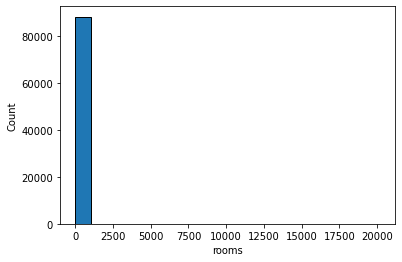

In [19]:
#Observamos la distribución de los datos sobre ambientes y notamos que la limpieza previa permitió eliminar outliers
sns.histplot(data.rooms.astype(float), bins=20
             , alpha=1, edgecolor = 'black',  linewidth=1)

Completamos datos de la columna precio por metro cuadrado con datos existentes

In [20]:
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'rooms',
       'properati_url', 'description', 'title'],
      dtype='object')

In [21]:
price_aprox_usd_null_mask = data.price_aprox_usd.isnull()
price_aprox_usd_null = data.price_aprox_usd[price_aprox_usd_null_mask ]
print("La cantidad de registros vacios en la columna price_aprox_usd es: " + str(len(price_aprox_usd_null)))

La cantidad de registros vacios en la columna price_aprox_usd es: 20410


In [22]:
surface_total_in_m2_null_mask = data.surface_total_in_m2.isnull()
surface_total_in_m2_null = data.surface_total_in_m2[surface_total_in_m2_null_mask]
print("La cantidad de registros vacios en la columna surface_total_in_m2 es: " + str(len(surface_total_in_m2_null)))

La cantidad de registros vacios en la columna surface_total_in_m2 es: 39328


In [23]:
price_usd_per_m2_null_mask = data.price_usd_per_m2.isnull()
price_usd_per_m2_null = data.price_usd_per_m2 [price_usd_per_m2_null_mask]
print("La cantidad de registros vacios en la columna price_usd_per_m2 es: " + str(len(price_usd_per_m2_null)))

La cantidad de registros vacios en la columna price_usd_per_m2 es: 52603


In [24]:
#Busco valores de superficie sin nulls
surface_total_in_m2_notnull_mask = data.surface_total_in_m2.notnull()
surface_total_in_m2_notnull = data.surface_total_in_m2[surface_total_in_m2_notnull_mask] #Eliminmar el tonumeric cuando compilemos
#surface_total_in_m2_notnull


In [25]:
#Uso los indices de los campos que no tienen nulls para encontrar los campos en precio
price_aprox_usd_aux = data.iloc[surface_total_in_m2_notnull.index, [11]]
price_aprox_usd_col = price_aprox_usd_aux.price_aprox_usd
#price_aprox_usd_col

In [26]:
#Calculo precio por metro cuadrado para las filas donde el valor de la columna orginal es null
price_usd_per_m2_aux = price_aprox_usd_col.div(surface_total_in_m2_notnull)
price_usd_per_m2_aux = price_usd_per_m2_aux.dropna() #Elimino NaN
price_usd_per_m2_aux[price_usd_per_m2_aux>0] #Dejo valores mayores a 0
price_usd_per_m2_aux= pd.DataFrame(price_usd_per_m2_aux, columns=['price_usd_per_m2_aux'])
#price_usd_per_m2_aux

In [27]:
#Reemplazo los nulls de price_usd_per_m2 con los valores de la columna auxiliar
data["price_usd_per_m2"].fillna(price_usd_per_m2_aux["price_usd_per_m2_aux"], inplace = True)

In [28]:
price_usd_per_m2_null_mask = data.price_usd_per_m2.isnull()
price_usd_per_m2_null = data.price_usd_per_m2 [price_usd_per_m2_null_mask]
print("La cantidad de registros vacios en la columna price_usd_per_m2 es: " + str(len(price_usd_per_m2_null)))

La cantidad de registros vacios en la columna price_usd_per_m2 es: 52354


In [29]:
dataset=describe_data(cols=data.columns,data=data)
dataset

,Null,% Null,Types
property_type,0,0.000,object
place_name,0,0.000,object
place_with_parent_names,0,0.000,object
state_name,0,0.000,object
geonames_id,18717,15.441,float64
lat-lon,51550,42.526,object
lat,51550,42.526,float64
lon,51550,42.526,float64
price,20410,16.837,float64
currency,0,0.000,object


Completamos datos de las columnas lat y lon con datos del dataset AR.txt (https://download.geonames.org/export/dump/) 

In [30]:
#limpiamos y completamos datos de columnas lat-lon 
mask_lat_lon = data[['lat-lon', 'lat', 'lon']]
mask_lat_lon

,lat-lon,lat,lon
0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447
...,...,...,...
121215,NaN,NaN,NaN
121216,NaN,NaN,NaN
121217,"-34.5706388726,-58.4755963355",-34.570639,-58.475596
121218,NaN,NaN,NaN


In [31]:
#cantidad de nulos en ambas columnas
cant_nulos_por_campo_lato_lon = mask_lat_lon.apply(lambda x: x.isnull().sum(), axis=0)
print(cant_nulos_por_campo_lato_lon)

lat-lon    51550
lat        51550
lon        51550
dtype: int64


In [32]:
#porcentajes de nulos en las columas enunciadas abajo
nulos_lat_lon=(data['lat-lon'].isnull().sum()*100 / len(data))
nulos_lat=(data['lat'].isnull().sum()*100 / len(data))
nulos_lon=(data['lon'].isnull().sum()*100 / len(data))
print(nulos_lat_lon)
print(nulos_lat)
print(nulos_lon)

42.52598581092229
42.52598581092229
42.52598581092229


In [33]:
#porcentajes de valores no-nulos
nulos_lat_lon_not=(data['lat-lon'].notnull().sum()*100 / len(data))
nulos_lat_not=(data['lat'].notnull().sum()*100 / len(data))
nulos_lon_not=(data['lon'].notnull().sum()*100 / len(data))
print(nulos_lat_lon_not)
print(nulos_lat_not)
print(nulos_lon_not)

57.47401418907771
57.47401418907771
57.47401418907771


In [34]:
#tomamos unicamente los valores no nulos 
lat_lot_not_null = mask_lat_lon.loc[mask_lat_lon['lat-lon'].notnull()]
lat_lot_not_null.head()

,lat-lon,lat,lon
0,"-34.6618237,-58.5088387",-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330
2,"-34.6522615,-58.5229825",-34.652262,-58.522982
3,"-34.6477969,-58.5164244",-34.647797,-58.516424
4,"-38.0026256,-57.5494468",-38.002626,-57.549447


In [35]:
lat_lot_not_null['valor_lat_sin_lon'] = lat_lot_not_null['lat-lon'].apply(lambda x: x.split(',')[0])
lat_lot_not_null['valor_lon_sin_lat'] = lat_lot_not_null['lat-lon'].apply(lambda x: x.split(',')[1])
lat_lot_not_null.head()

C:\Users\fox00\AppData\Local\Temp\ipykernel_13956\678879428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_lot_not_null['valor_lat_sin_lon'] = lat_lot_not_null['lat-lon'].apply(lambda x: x.split(',')[0])
C:\Users\fox00\AppData\Local\Temp\ipykernel_13956\678879428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_lot_not_null['valor_lon_sin_lat'] = lat_lot_not_null['lat-lon'].apply(lambda x: x.split(',')[1])


,lat-lon,lat,lon,valor_lat_sin_lon,valor_lon_sin_lat
0,"-34.6618237,-58.5088387",-34.661824,-58.508839,-34.6618237,-58.5088387
1,"-34.9038831,-57.9643295",-34.903883,-57.964330,-34.9038831,-57.9643295
2,"-34.6522615,-58.5229825",-34.652262,-58.522982,-34.6522615,-58.5229825
3,"-34.6477969,-58.5164244",-34.647797,-58.516424,-34.6477969,-58.5164244
4,"-38.0026256,-57.5494468",-38.002626,-57.549447,-38.0026256,-57.5494468


In [36]:
data['lat'] = data['lat'].astype('float64')
data['lon'] = data['lon'].astype('float64')
describe_data(data.columns, data).loc[['lat', 'lon']]

,Null,% Null,Types
lat,51550,42.526,float64
lon,51550,42.526,float64


In [37]:
#tomo los nulos lat y lon y los no_nulos de geonames_id del dataset data
geo_colums = data[['geonames_id', 'lat', 'lon']]
geo_subset_null_mask = (data.loc[:,'geonames_id'].notnull()) & (data.loc[:,'lat'].isnull()) & (data.loc[:,'lon'].isnull())
geo_subset_null = geo_colums[geo_subset_null_mask]
describe_data(geo_subset_null.columns, geo_subset_null)
geo_subset_null.head()


,geonames_id,lat,lon
13,3430234.0,NaN,NaN
14,3430234.0,NaN,NaN
42,3429979.0,NaN,NaN
49,3434130.0,NaN,NaN
62,3436042.0,NaN,NaN


In [38]:
#los nombres de columnas se encuentran en el archivo readme.txt
geonames_columns = ['geonames_id', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'feature_code', 'country_code', 'cc2', 
                    'admin1_code', 'admin2_code', 'admin3_code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date']

geonames_data = pd.read_csv('AR.txt', delimiter='\t', names=geonames_columns)
geonames_data.set_index('geonames_id', inplace=True)
geonames_data.head()

,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4 code,population,elevation,dem,timezone,modification date
geonames_id,,,,,,,,,,,,,,,,,,
3427200,Sierra del 15,Sierra del 15,NaN,-37.96613,-57.94670,T,HLL,AR,NaN,1.0,6357.0,NaN,NaN,0,NaN,200,America/Argentina/Buenos_Aires,2016-01-30
3427201,Puesto 1 Napoleón Cué,Puesto 1 Napoleon Cue,NaN,-28.63333,-56.11667,S,HSE,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,79,America/Argentina/Cordoba,2016-01-30
3427202,Cañada del Zorro,Canada del Zorro,NaN,-32.16667,-59.50000,H,STM,AR,NaN,8.0,NaN,NaN,NaN,0,NaN,65,America/Argentina/Cordoba,1993-12-21
3427203,Estancia Zorraquín,Estancia Zorraquin,NaN,-31.51553,-58.55208,S,RNCH,AR,NaN,8.0,30113.0,NaN,NaN,0,NaN,71,America/Argentina/Cordoba,2016-01-30
3427204,Estancia Zequeira Cué,Estancia Zequeira Cue,NaN,-28.43825,-56.08838,S,RNCH,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,98,America/Argentina/Cordoba,2016-01-30


In [39]:
#creo un diccionario tomando unicamente las key de los geonames_id y le asigno conforme su index la key de su coordenada (lat y/o lon)
geonames_lat_mapping_dict = { indx: geonames_data.loc[int(indx)].loc['latitude'] for indx in geo_subset_null['geonames_id'].unique().astype('float') if indx in geonames_data.index }
geonames_lon_mapping_dict = { indx: geonames_data.loc[int(indx)].loc['longitude'] for indx in geo_subset_null['geonames_id'].unique().astype('float') if indx in geonames_data.index }
#describe_data(data.columns, data)
#geonames_lon_mapping_dict

In [40]:
#ahora le asignamos su key por cada fila que tenga nulo , conforme a su correspondiente index 
data['lat'] = data.apply(lambda x: geonames_lat_mapping_dict.get(x['geonames_id'], np.nan) if np.isnan(x['lat']) else x['lat'], axis=1)
data['lon'] = data.apply(lambda x: geonames_lon_mapping_dict.get(x['geonames_id'], np.nan) if np.isnan(x['lon']) else x['lon'], axis=1)
#describe_data(data.columns, data)

In [41]:
describe_data(data.columns, data).loc[['lat', 'lon']]

,Null,% Null,Types
lat,8346,6.885,float64
lon,8346,6.885,float64


In [42]:
#agregar descripción
geonames_data.loc[ geonames_data['name'] == 'Pilar' ]

,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4 code,population,elevation,dem,timezone,modification date
geonames_id,,,,,,,,,,,,,,,,,,
3429980,Pilar,Pilar,Pilar,-34.45866,-58.91420,P,PPLA2,AR,NaN,1.0,6638.0,NaN,NaN,226517,NaN,27,America/Argentina/Buenos_Aires,2017-12-21
3480748,Pilar,Pilar,NaN,-34.43750,-58.90556,L,LCTY,AR,NaN,1.0,NaN,NaN,NaN,0,NaN,18,America/Argentina/Buenos_Aires,2013-08-08
3841149,Pilar,Pilar,Pilar,-31.67890,-63.87964,P,PPL,AR,NaN,5.0,14119.0,NaN,NaN,12488,NaN,334,America/Argentina/Cordoba,2016-01-30
3841150,Pilar,Pilar,NaN,-31.43937,-61.25884,P,PPL,AR,NaN,21.0,82070.0,NaN,NaN,0,NaN,62,America/Argentina/Cordoba,2016-01-30


In [43]:
#Calculo cuántos valores distintos tengo en la columna place_with_parent_names que incluye provincia y barrio.

data.place_with_parent_names.value_counts().head(3)

|Argentina|Santa Fe|Rosario|                               8504
|Argentina|CÃ³rdoba|CÃ³rdoba|                              6606
|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar del Plata|    6534
Name: place_with_parent_names, dtype: int64

In [44]:
#Hacemos el split de los valores que contiene la columna 'place_with_parents_name'.

splitted_locations = data.place_with_parent_names.str.split('|')
splitted_locations

0               [, Argentina, Capital Federal, Mataderos, ]
1         [, Argentina, Bs.As. G.B.A. Zona Sur, La Plata, ]
2               [, Argentina, Capital Federal, Mataderos, ]
3                 [, Argentina, Capital Federal, Liniers, ]
4         [, Argentina, Buenos Aires Costa AtlÃ¡ntica, M...
                                ...                        
121215           [, Argentina, Capital Federal, Belgrano, ]
121216    [, Argentina, Bs.As. G.B.A. Zona Norte, San Is...
121217      [, Argentina, Capital Federal, Villa Urquiza, ]
121218    [, Argentina, Buenos Aires Costa AtlÃ¡ntica, M...
121219                     [, Argentina, Capital Federal, ]
Name: place_with_parent_names, Length: 121220, dtype: object

In [45]:
#como el tercer valor es capital federal se toma tercera posicion x[3] y el x[-2] del ultimo -2
data['ciudad'] = splitted_locations.apply(lambda x: x[3])
data['barrio'] = splitted_locations.apply(lambda x: x[-2])

In [46]:
data.barrio.value_counts()

CÃ³rdoba                9254
Rosario                 8504
Mar del Plata           6534
Tigre                   3324
Nordelta                3315
                        ... 
Pehuen-cÃ³                 1
Bosques                    1
Banda del RÃ­o SalÃ­       1
Villa UniÃ³n               1
Rodeo de la Cruz           1
Name: barrio, Length: 1061, dtype: int64

In [47]:
#geonames_data.iloc[geonames_data.index== 3427200.0,: ]
geonames_data = pd.read_csv('AR.txt', delimiter='\t', names=geonames_columns)

In [48]:
#chequeamos que coincidan los registros de geoname entre los datasets.

caso_1 = geonames_data[geonames_data['geonames_id'] == 3430234.0]
print(caso_1.loc[:,[ "name", "latitude", "longitude"]])

caso_2 = data[data['geonames_id'] == 3430234.0].sample(1)
print(caso_2.loc[:,["geonames_id", "place_name", "lat", "lon"]])

         name  latitude  longitude
3024  Palermo -34.58856  -58.43053
       geonames_id place_name        lat       lon
89515    3430234.0    Palermo -34.576012 -58.39989


In [49]:
#Mergeamos los dataset por "geonames_id", asumiendo entonces que coinciden estos datos en ambos.

data = data.merge(geonames_data, how='left', on= 'geonames_id', left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True)

In [50]:
# Ahora vamos a imputar los datos faltantes de latitud y longitud, a partir de los geonames.

data['lat'] = data['lat'].fillna(data['latitude'])
data['lon'] = data['lon'].fillna(data['longitude'])

In [51]:
#Verificaremos entonces el porcentaje de nulos de ambas columnas, post imputación. Como vemos, se redujo de un 38% a un 7%.

print("Este es el porentaje de valores nulos de la columna latitud: {}".format(data['lat'].isnull().sum()*100 / len(data)))
print("Este es el porentaje de valores nulos de la columna longitud: {}".format(data['lon'].isnull().sum()*100 / len(data)))

Este es el porentaje de valores nulos de la columna latitud: 5.780399274047187
Este es el porentaje de valores nulos de la columna longitud: 5.780399274047187


In [52]:
dg = data.loc[:,['state_name', 'lat',"lon"]]
print(dg)

                           state_name        lat        lon
0                     Capital Federal -34.661824 -58.508839
1              Bs.As. G.B.A. Zona Sur -34.903883 -57.964330
2                     Capital Federal -34.652262 -58.522982
3                     Capital Federal -34.647797 -58.516424
4       Buenos Aires Costa AtlÃ¡ntica -38.002626 -57.549447
...                               ...        ...        ...
121215                Capital Federal -34.562700 -58.458290
121216       Bs.As. G.B.A. Zona Norte -34.463120 -58.534810
121217                Capital Federal -34.570639 -58.475596
121218  Buenos Aires Costa AtlÃ¡ntica        NaN        NaN
121219                Capital Federal -34.600000 -58.450000

[121220 rows x 3 columns]


In [53]:
#Agregamos la columna 'geometry'
geodg = gpd.GeoDataFrame(dg, geometry=gpd.points_from_xy(dg.lon, dg.lat))
print (geodg)

                           state_name        lat        lon  \
0                     Capital Federal -34.661824 -58.508839   
1              Bs.As. G.B.A. Zona Sur -34.903883 -57.964330   
2                     Capital Federal -34.652262 -58.522982   
3                     Capital Federal -34.647797 -58.516424   
4       Buenos Aires Costa AtlÃ¡ntica -38.002626 -57.549447   
...                               ...        ...        ...   
121215                Capital Federal -34.562700 -58.458290   
121216       Bs.As. G.B.A. Zona Norte -34.463120 -58.534810   
121217                Capital Federal -34.570639 -58.475596   
121218  Buenos Aires Costa AtlÃ¡ntica        NaN        NaN   
121219                Capital Federal -34.600000 -58.450000   

                           geometry  
0       POINT (-58.50884 -34.66182)  
1       POINT (-57.96433 -34.90388)  
2       POINT (-58.52298 -34.65226)  
3       POINT (-58.51642 -34.64780)  
4       POINT (-57.54945 -38.00263)  
...            

In [54]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geoarg = world[world.name=='Argentina']
print (geoarg)

    pop_est      continent       name iso_a3  gdp_md_est  \
9  44293293  South America  Argentina    ARG    879400.0   

                                            geometry  
9  MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  


In [55]:
#revistar gráfico mapa país
def to_chart(p_ciudad, p_pais):
    
    ax = p_pais.plot(figsize=(10,15), color='white', edgecolor='black')

    p_ciudad.plot(ax=ax, color='red', alpha= 0.4)


plt.show()

In [56]:
data.drop(['asciiname', 'alternatenames', 'feature_class', 'feature_code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'population', 'dem', 'timezone', 'modification date', 'elevation', 'admin4 code', 'country_code', 'name','latitude','longitude', ],axis=1, inplace=True)

In [57]:
dataset=describe_data(cols=data.columns,data=data)
dataset


,Null,% Null,Types
property_type,0,0.000,object
place_name,0,0.000,object
place_with_parent_names,0,0.000,object
state_name,0,0.000,object
geonames_id,18717,15.441,float64
lat-lon,51550,42.526,object
lat,7007,5.780,float64
lon,7007,5.780,float64
price,20410,16.837,float64
currency,0,0.000,object


In [58]:
data.shape

(121220, 22)

In [59]:
#Calculo el valor medio por barrio
Valor_medio = data.groupby(['state_name','barrio'])['price_usd_per_m2'].mean()
Valor_medio
pd.DataFrame(Valor_medio)


price_usd_per_m2
state_name               barrio                                   
Bs.As. G.B.A. Zona Norte                               2027.674620
                          Country Maschwitz Club       1369.986720
                          los alamos                   1600.000000
                         Acacias Blancas               1181.861023
                         Acassuso                      2062.722980
...                                                            ...
TucumÃ¡n                 TafÃ­ Viejo                    716.978807
                         TafÃ­ del Valle                569.477620
                         TucumÃ¡n                       636.118219
                         Villa Belgrano                        NaN
                         Yerba Buena                    958.932482

[1099 rows x 1 columns]

In [60]:
data = pd.merge(data, Valor_medio, how='left', on='barrio') #Creo una columna auxiliar en el dataframe con los datos nuevos

In [61]:
#data.shape

In [62]:
#Reemplazo los nulls de price_usd_per_m2 con los valores de la columna auxiliar
data["price_usd_per_m2_x"].fillna(data["price_usd_per_m2_y"], inplace = True)

data.rename(columns={"price_usd_per_m2_y": "price_usd_per_m2"},inplace = True)

data.head(5)

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,surface_covered_in_m2,price_usd_per_m2_x,price_per_m2,rooms,properati_url,description,title,ciudad,barrio,price_usd_per_m2
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.000000,2.0,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,Mataderos,Mataderos,1552.250025
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,1584.960195,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,La Plata,La Plata,1584.960195
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,1309.090909,1309.090909,2.0,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Mataderos,Mataderos,1552.250025
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,NaN,1803.908335,NaN,3.0,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,Liniers,Liniers,1803.908335
4,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Buenos Aires Costa AtlÃ¡ntica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,35.0,1828.571429,1828.571429,1.0,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,Mar del Plata,Centro,1867.158914


In [63]:
dataset=describe_data(cols=data.columns,data=data)
dataset

,Null,% Null,Types
property_type,0,0.000,object
place_name,0,0.000,object
place_with_parent_names,0,0.000,object
state_name,0,0.000,object
geonames_id,19939,15.241,float64
lat-lon,55985,42.794,object
lat,7401,5.657,float64
lon,7401,5.657,float64
price,21955,16.782,float64
currency,0,0.000,object


In [64]:
# Vemos la cantidad de registros que hay de cada provincia/localidad, agregando una columna "total por provincia".
grouped_by_state = data.groupby("state_name").size().reset_index(name="Total_por_provincia")
grouped_by_state
#Calculamos la frecuencia de cada provincia en proporción al total:
data_por_state = data["state_name"]
proportions = 100. * data_por_state.value_counts() / len(data_por_state)
proportions

Capital Federal                  26.243455
Bs.As. G.B.A. Zona Norte         22.131091
Bs.As. G.B.A. Zona Sur           11.237149
CÃ³rdoba                          9.376648
Bs.As. G.B.A. Zona Oeste          8.535830
Santa Fe                          7.990827
Buenos Aires Costa AtlÃ¡ntica     7.834894
Buenos Aires Interior             1.754252
Corrientes                        0.836232
Mendoza                           0.648194
RÃ­o Negro                        0.617619
NeuquÃ©n                          0.560290
TucumÃ¡n                          0.515192
Misiones                          0.356201
Entre RÃ­os                       0.301166
San Luis                          0.282056
Salta                             0.212498
Chubut                            0.201032
La Pampa                          0.120008
San Juan                          0.063444
Formosa                           0.049685
Chaco                             0.043570
Tierra Del Fuego                  0.023696
Catamarca  

In [65]:
#Corregimos los nombres de las provincias en la columna "state_name" utilizando diccionarios:
values_to_replace = {'CÃ³rdoba':'Córdoba', 'Buenos Aires Costa AtlÃ¡ntica':'Buenos Aires Costa Atlántica', 'RÃo Negro':'Río Negro', "TucumÃ¡n":"Tucumán", "NeuquÃ©n":"Neuquén", "Entre RÃos":"Entre Ríos",
                    "Capital Federal":"Capital Federal", "Bs.As. G.B.A. Zona Sur":"Bs.As. G.B.A. Zona Sur", "Santa Fe":"Santa Fé", "Bs.As. G.B.A. Zona Oeste":"Bs.As. G.B.A. Zona Oeste", 
                    "Buenos Aires Interior":"Buenos Aires Interior", "Mendoza":"Mendoza", "Misiones":"Misiones", "Chubut":"Chubut", "San Luis":"San Luis",
                    "Corrientes":"Corrientes", "Salta":"Salta", "La Pampa":"La Pampa", "Chaco":"Chaco", "San Juan":"San Juan", "Catamarca":"Catamarca",
                    "Santa Cruz":"Santa Cruz", "Tierra Del Fuego":"Tierra Del Fuego", "Jujuy":"Jujuy", "Formosa":"Formosa", "Santiago Del Estero":"Santiago Del Estero",
                    "La Rioja":"La Rioja"}

In [66]:
# A continuación usamos el método map para sustituir los nuevos valores acordes al último diccionario:
data["state_name"] = data['state_name'].map(values_to_replace)
data["state_name"].value_counts()

Capital Federal                 34333
Bs.As. G.B.A. Zona Sur          14701
Córdoba                         12267
Bs.As. G.B.A. Zona Oeste        11167
Santa Fé                        10454
Buenos Aires Costa Atlántica    10250
Buenos Aires Interior            2295
Corrientes                       1094
Mendoza                           848
Neuquén                           733
Tucumán                           674
Misiones                          466
San Luis                          369
Salta                             278
Chubut                            263
La Pampa                          157
San Juan                           83
Formosa                            65
Chaco                              57
Tierra Del Fuego                   31
Catamarca                          31
Jujuy                              26
Santa Cruz                         20
La Rioja                            4
Santiago Del Estero                 4
Name: state_name, dtype: int64

<AxesSubplot:xlabel='state_name', ylabel='Count'>

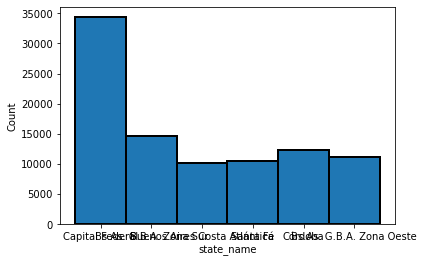

In [67]:
#armamos una máscara y reducimos el dataset quedandonos con datos de CABA, BA, Córdoba y Santa Fe
freq_mask = proportions > 7
final_states = proportions[freq_mask]
states_list = list(final_states.index)
mask_1 = data["state_name"] == 'Capital Federal'
mask_2 = data["state_name"] == 'Bs.As. G.B.A. Zona Norte'
mask_3 = data["state_name"] == 'Bs.As. G.B.A. Zona Sur'
mask_4 = data["state_name"] == 'Bs.As. G.B.A. Zona Oeste'
mask_5 = data["state_name"] == 'Buenos Aires Costa Atlántica'
mask_6 = data["state_name"] == 'Santa Fé'
mask_7 = data["state_name"] == 'Córdoba'
state_mask = mask_1 | mask_2 | mask_3 | mask_4 | mask_5 | mask_6 | mask_7
filtered_data = data[state_mask]
filtered_data.columns
sns.histplot(filtered_data.state_name
             , bins=400, alpha=1, edgecolor = 'black',  linewidth=2)

In [68]:
filtered_data.shape
#filtered_data.head(1)

(93172, 23)

In [69]:
#Evaluamos monedas aceptadas en la transacción 
#table_price = pd.pivot_table(filtered_data, index=['currency'], values=['price_aprox_local_currency'], aggfunc=['count'])
#table_price

In [70]:
#Eliminamos monedas que no utilizadas con frecuencia en relación al peso y al dólar
filtered_data.drop(filtered_data[filtered_data.currency=='PEN'].index, inplace=True)
filtered_data.drop(filtered_data[filtered_data.currency=='PEN'].index, inplace=True)
filtered_data.drop(filtered_data[filtered_data.currency=='ARS'].index, inplace=True)
filtered_data.drop(filtered_data[filtered_data.currency=='nan'].index, inplace=True)

filtered_data.currency

c:\Users\fox00\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


0         USD
1         USD
2         USD
3         USD
4         USD
         ... 
130819    USD
130821    USD
130822    USD
130823    USD
130824    USD
Name: currency, Length: 65146, dtype: object

In [71]:
#filtered_data.columns

Preparamos los datos para evaluar los outliners

In [72]:
#Se seleccionan las columnas que se van a analizar
new_data = data[['rooms','price','surface_total_in_m2','property_type','surface_covered_in_m2','price_usd_per_m2']]
new_data.head()

,rooms,price,surface_total_in_m2,property_type,surface_covered_in_m2,price_usd_per_m2
0,2.0,62000.0,55.0,PH,40.0,1552.250025
1,NaN,150000.0,NaN,apartment,NaN,1584.960195
2,2.0,72000.0,55.0,apartment,55.0,1552.250025
3,3.0,95000.0,NaN,PH,NaN,1803.908335
4,1.0,64000.0,35.0,apartment,35.0,1867.158914


Text(0.5, 8.95999999999998, 'Superficie total')

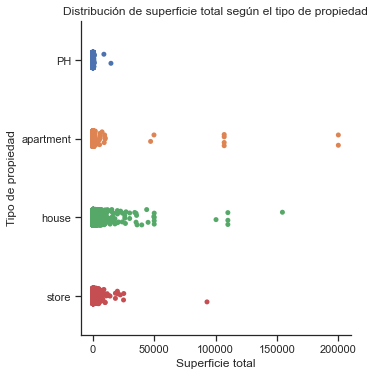

In [73]:
#Se grafica la distribución de la superficie total según los tipos de propiedades
sns.set_theme(style="ticks")
sns.catplot(data = new_data, x = "surface_total_in_m2", y = "property_type")
plt.title('Distribución de superficie total según el tipo de propiedad')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

Text(0.5, 0, 'Superficie total')

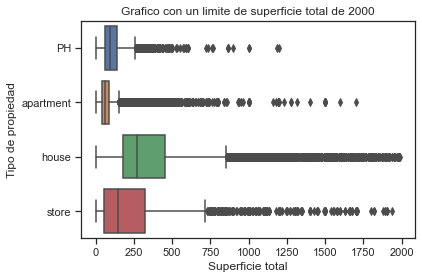

In [74]:
#Según el gráfico anterior se puede analizar que la concentración de los datos se encuentra dentro del primer cuadrante (200.000 de superficie total)
#Se grafican boxplots para analizar outliers
sns.boxplot(data = new_data[new_data['surface_total_in_m2'] < 2000], y = "property_type", x = "surface_total_in_m2")
plt.title('Grafico con un limite de superficie total de 2000')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

Text(0.5, 0, 'Superficie total')

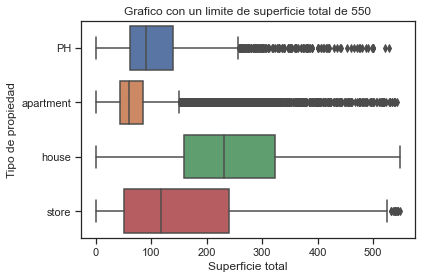

In [75]:
#Se puede analizar que la propiedad con mayor superficie total 
sns.boxplot(data = new_data[new_data['surface_total_in_m2'] < 550], y = "property_type", x = "surface_total_in_m2")
plt.title('Grafico con un limite de superficie total de 550')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

In [76]:
# Se crean nuevos dataset según el tipo de propiedad 
data_ph = new_data[new_data["property_type"].isin(['PH'])]
data_apartm = new_data[new_data["property_type"].isin(['apartment'])]
data_house = new_data[new_data["property_type"].isin(['house'])]
data_store = new_data[new_data["property_type"].isin(['store'])]
#data_ph
#data_apartm

In [77]:
def get_iqr_values(datafr_indx, colmn_name):
    median = datafr_indx[colmn_name].median()
    q1 = datafr_indx[colmn_name].quantile(0.25) # 1st quartile
    q3 = datafr_indx[colmn_name].quantile(0.75) # 3rd quartile
    iqr = (q3-q1)*1.5 #Interquantile range
    minimum  = q1-iqr # The minimum value or the |- marker in the box plot
    maximum = q3+iqr # The maximum value or the -| marker in the box plot
    print("- Valor minimo:", minimum)
    print("- Valor maximo:", maximum)
    #por si queremos ver los valores antes y despues con describe
    
    #low_filt= (datafr_indx[colmn_name]>minimum)
    #up_filt= (datafr_indx[colmn_name]>maximum)
    #data_mask=np.logical_and(low_filt,up_filt)
    #data_clean_up_down= datafr_indx[~data_mask]
    #print(datafr_indx.describe())
    #print(data_clean_up_down.describe())

In [78]:
#Se obtienen los valores maximos y minimos de cada propiedad
print("Valores de tipo de propiedad PH:")
get_iqr_values(data_ph, 'surface_total_in_m2')
print("----------------------------------")
print("Valores de tipo de propiedad Apartm:")
get_iqr_values(data_apartm, 'surface_total_in_m2')
print("----------------------------------")
print("Valores de tipo de propiedad House:")
get_iqr_values(data_house, 'surface_total_in_m2')
print("----------------------------------")
print("Valores de tipo de propiedad Store:")
get_iqr_values(data_store, 'surface_total_in_m2')

Valores de tipo de propiedad PH:
- Valor minimo: -56.5
- Valor maximo: 259.5
----------------------------------
Valores de tipo de propiedad Apartm:
- Valor minimo: -23.0
- Valor maximo: 153.0
----------------------------------
Valores de tipo de propiedad House:
- Valor minimo: -240.0
- Valor maximo: 880.0
----------------------------------
Valores de tipo de propiedad Store:
- Valor minimo: -397.5
- Valor maximo: 822.5


In [79]:
#Se eliminan los outliers según los valores máximos de cada propiedad obtenidos anteriormente
#Los valores minimos al ser negativos, se filtran los mayores a 0
#Y se filtran los valores menores al valor máximo de cada tipo de propiedad.
print("Cantidad de propiedades de tipo PH antes de eliminar outliers",data_ph.shape)
new_data_ph = data_ph[(data_ph['surface_total_in_m2'] <= 259) & (data_ph['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo PH después de eliminar outliers",new_data_ph.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Apartm antes de eliminar outliers",data_apartm.shape)
new_data_apartm = data_apartm[(data_apartm['surface_total_in_m2'] <= 153) & (data_apartm['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo Apartm después de eliminar outliers",new_data_apartm.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo House antes de eliminar outliers",data_house.shape)
new_data_house = data_house[(data_house['surface_total_in_m2'] <= 880) & (data_house['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo House después de eliminar outliers",new_data_house.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Store antes de eliminar outliers",data_store.shape)
new_data_store = data_store[(data_store['surface_total_in_m2'] <= 822) & (data_store['surface_total_in_m2'] >= 0)]

print("Cantidad de propiedades de tipo Store después de eliminar outliers",new_data_store.shape)


long_ph = len(new_data_ph)
long_apartm = len(new_data_apartm)
long_casa = len(new_data_house)
long_store = len(new_data_store)

new_long = long_ph + long_apartm + long_casa + long_store
print("--------------------------------------------------------------------")
print("Tamaño del data set con outliers:      ", len(new_data))
print("Tamaño del nuevo data set sin outliers: ", new_long)

Cantidad de propiedades de tipo PH antes de eliminar outliers (6281, 6)
Cantidad de propiedades de tipo PH después de eliminar outliers (3731, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Apartm antes de eliminar outliers (75370, 6)
Cantidad de propiedades de tipo Apartm después de eliminar outliers (50507, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo House antes de eliminar outliers (44768, 6)
Cantidad de propiedades de tipo House después de eliminar outliers (24796, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Store antes de eliminar outliers (4406, 6)
Cantidad de propiedades de tipo Store después de eliminar outliers (2558, 6)
--------------------------------------------------------------------
Tamaño del data set con outliers:       130825
Tamaño del nuevo data set sin outliers:  81592


Graficamos los Datos con y sin Outliners de PH, APARTMENT, HOUSE y STORE con respecto a surface_total_in_m2

<AxesSubplot:>

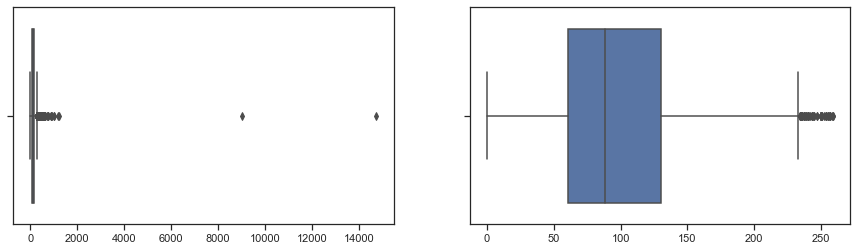

In [80]:
fig,ax  = plt.subplots(1,2, figsize=(15,4))
sns.boxplot(x=data_ph['surface_total_in_m2'].values,ax=ax[0])
sns.boxplot(x=new_data_ph['surface_total_in_m2'].values,ax=ax[1])

<AxesSubplot:>

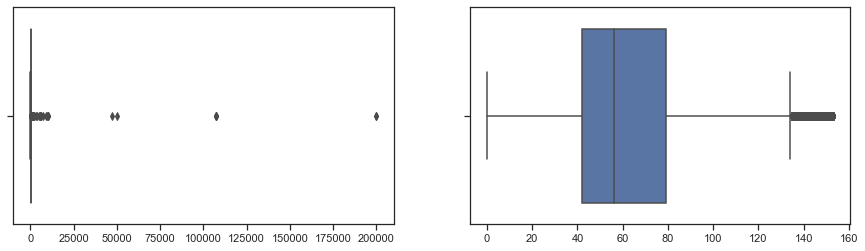

In [81]:
fig,ax  = plt.subplots(1,2, figsize=(15,4))
sns.boxplot(x=data_apartm['surface_total_in_m2'].values,ax=ax[0])
sns.boxplot(x=new_data_apartm['surface_total_in_m2'].values,ax=ax[1])

<AxesSubplot:>

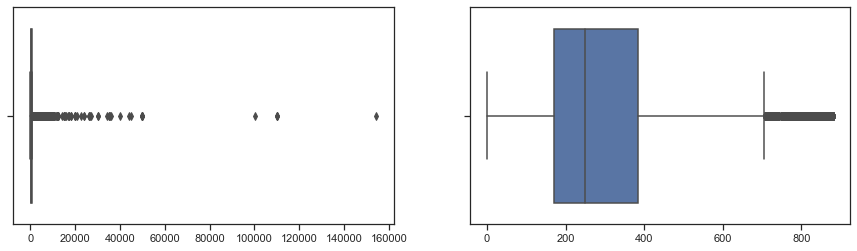

In [82]:
fig,ax  = plt.subplots(1,2, figsize=(15,4))
sns.boxplot(x=data_house['surface_total_in_m2'].values,ax=ax[0])
sns.boxplot(x=new_data_house['surface_total_in_m2'].values,ax=ax[1])

<AxesSubplot:>

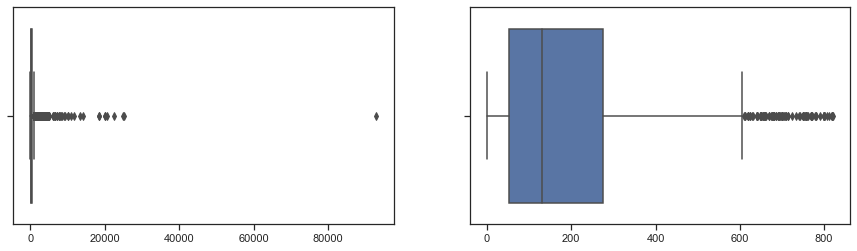

In [83]:
fig,ax  = plt.subplots(1,2, figsize=(15,4))
sns.boxplot(x=data_store['surface_total_in_m2'].values,ax=ax[0])
sns.boxplot(x=new_data_store['surface_total_in_m2'].values,ax=ax[1])


In [84]:
#dataset

In [85]:
#Se concatenan los data set sin outliers
frames = [new_data_ph,new_data_apartm,new_data_house,new_data_store]
dataset_clear = pd.concat(frames)
dataset_clear.shape

#dataset_clear = data.merge(dataset_clear, how='left', on= frames)
#dataset_clear.sample(3)

(81592, 6)

Cantidad de propiedades con superficie cubierta no mayor a la total (72954, 6)


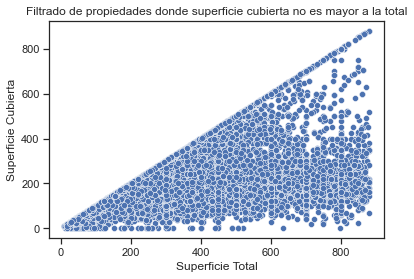

In [86]:
#filtered_data
#Se filtran las propiedades que tienen una superficie cubierta mayor a la superficie total.
dataset_clear = dataset_clear[dataset_clear['surface_covered_in_m2'] <= dataset_clear['surface_total_in_m2']]
sns.scatterplot(x="surface_total_in_m2", y="surface_covered_in_m2", data = dataset_clear)
plt.title('Filtrado de propiedades donde superficie cubierta no es mayor a la total')
plt.xlabel('Superficie Total')
plt.ylabel('Superficie Cubierta')
print("Cantidad de propiedades con superficie cubierta no mayor a la total",dataset_clear.shape)

In [87]:
#Se analiza si todos los tipos de moneda son en dólares
filtered_data['currency'].unique().tolist()

['USD']

Text(0.5, 1.0, 'Cantidad de propiedades por precio')

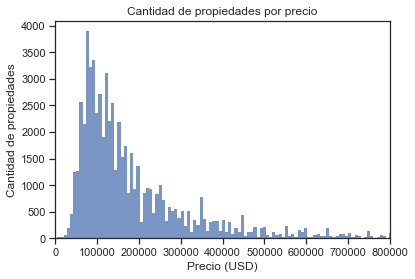

In [88]:
#Se analiza la distribución del precio
#La mayor cantidad de propiedades tienen un precio entre 100.000 y 200.000 
#Es poca la cantidad de propiedades que tienen precios mayores a 400.000
sns.histplot(filtered_data['price']);
plt.xlim(0,800000)
plt.xlabel('Precio (USD)')
plt.ylabel('Cantidad de propiedades')
plt.title('Cantidad de propiedades por precio')

Graficamos nuevamente con los datos sin los outliners

Text(0.5, 8.95999999999998, 'Superficie total')

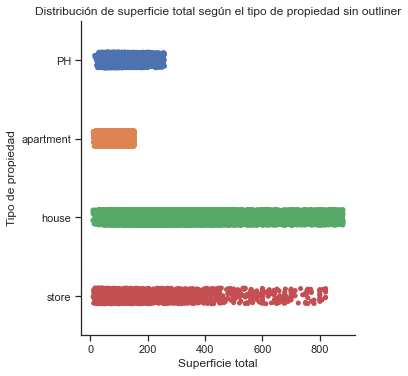

In [89]:
#Se grafica la distribución de la superficie total según los tipos de propiedades sin los outliners
sns.set_theme(style="ticks")
sns.catplot(data = dataset_clear, x = "surface_total_in_m2", y = "property_type")
plt.title('Distribución de superficie total según el tipo de propiedad sin outliner')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

C:\Users\fox00\AppData\Local\Temp\ipykernel_13956\1903285090.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


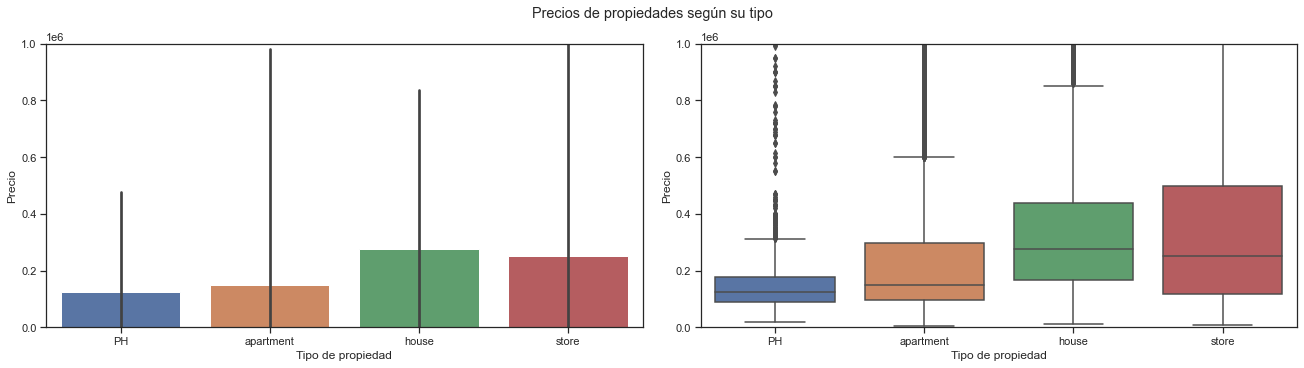

In [90]:
#Graficar la distribución del precio según el tipo de propiedad

fig, ax = plt.subplots(1,2, figsize=(18,5),constrained_layout = True)
sns.barplot(data = dataset_clear, x="property_type", y="price", estimator=np.median, ci='sd',ax=ax[0])
ax[0].set_xlabel('Tipo de propiedad')
ax[0].set_ylabel('Precio')
ax[0].set_ylim(0,1000000)
sns.boxplot(data = dataset_clear, x = 'property_type', y = 'price',ax=ax[1])
ax[1].set_xlabel('Tipo de propiedad')
ax[1].set_ylabel('Precio')
ax[1].set_ylim(0,1000000)
plt.suptitle("Precios de propiedades según su tipo")
fig.show()

In [91]:
#Filtrado de outliers basandonos en el tipo de propiedad

#Nuevos data set según el tipo de propiedad 
data_ph_clear = dataset_clear[dataset_clear["property_type"] == 'PH']
data_apartm_clear = dataset_clear[dataset_clear["property_type"] == 'apartment']
data_house_clear = dataset_clear[dataset_clear["property_type"] == 'house']
data_store_clear = dataset_clear[dataset_clear["property_type"] == 'store']
#Analizamos los valores maximos y minimos de cada dataset:
print("Valores de tipo de propiedad PH:")
get_iqr_values(data_ph_clear, 'price')
print("----------------------------------")
print("Valores de tipo de propiedad Apartment:")
get_iqr_values(data_apartm_clear, 'price')
print("----------------------------------")
print("Valores de tipo de propiedad house:")
get_iqr_values(data_house_clear, 'price')
print("----------------------------------")
print("Valores de tipo de propiedad Store:")
get_iqr_values(data_store_clear, 'price')

Valores de tipo de propiedad PH:
- Valor minimo: -47000.0
- Valor maximo: 313000.0
----------------------------------
Valores de tipo de propiedad Apartment:
- Valor minimo: -208750.0
- Valor maximo: 601250.0
----------------------------------
Valores de tipo de propiedad house:
- Valor minimo: -247500.0
- Valor maximo: 852500.0
----------------------------------
Valores de tipo de propiedad Store:
- Valor minimo: -458750.0
- Valor maximo: 1075250.0


In [92]:
#Filtramos los data set según los valores maximos y minimos calculados anteriormente
#Los valores minimos al ser negativos, se filtran los mayores a 0
#Y se filtran los valores menores al valor máximo de cada tipo de propiedad.
print("Tamaño del data set con outliers en precio:", len(dataset_clear))
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo PH antes de eliminar outliers",data_ph_clear.shape)
new_data_ph_clear = data_ph_clear[(data_ph_clear['price'] <= 310000) & (data_ph_clear['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo PH después de eliminar outliers",new_data_ph_clear.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Depto antes de eliminar outliers",data_apartm_clear.shape)
new_data_apartm_clear = data_apartm_clear[(data_apartm_clear['price'] <= 607500) & (data_apartm_clear['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo Depto después de eliminar outliers",new_data_apartm_clear.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Casa antes de eliminar outliers",data_house_clear.shape)
new_data_house_clear = data_house_clear[(data_house_clear['price'] <= 860000) & (data_house_clear['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo Casa después de eliminar outliers",new_data_house_clear.shape)
print("--------------------------------------------------------------------")
print("Cantidad de propiedades de tipo Casa antes de eliminar outliers",data_store_clear.shape)
new_data_store_clear = data_store_clear[(data_store_clear['price'] <= 1071500) & (data_store_clear['surface_total_in_m2'] >= 0)]
print("Cantidad de propiedades de tipo Casa después de eliminar outliers",new_data_store_clear.shape)

#long_ph_clear = len(new_data_ph_clear)
#long_apartm_clear = len(new_data_apartm_clear)
#long_house_clear = len(new_data_house_clear)
#long_store_clear = len(new_data_store_clear)

new_long_clear = len(new_data_ph_clear) + len(new_data_apartm_clear) + len(new_data_house_clear) + len(new_data_store_clear)
print("--------------------------------------------------------------------")
print("Tamaño del nuevo data set sin outliers en precio:", new_long_clear)

Tamaño del data set con outliers en precio: 72954
--------------------------------------------------------------------
Cantidad de propiedades de tipo PH antes de eliminar outliers (3465, 6)
Cantidad de propiedades de tipo PH después de eliminar outliers (2903, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Depto antes de eliminar outliers (45191, 6)
Cantidad de propiedades de tipo Depto después de eliminar outliers (31821, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Casa antes de eliminar outliers (22221, 6)
Cantidad de propiedades de tipo Casa después de eliminar outliers (17064, 6)
--------------------------------------------------------------------
Cantidad de propiedades de tipo Casa antes de eliminar outliers (2077, 6)
Cantidad de propiedades de tipo Casa después de eliminar outliers (1509, 6)
--------------------------------------------------------------------
Tam

Text(0.5, 8.95999999999998, 'Superficie total')

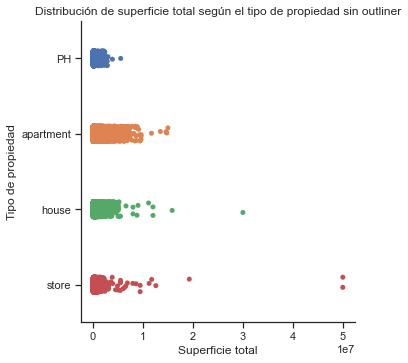

In [93]:
#Se grafica la distribución de la superficie total según los tipos de propiedades sin los outliners
sns.set_theme(style="ticks")
sns.catplot(data = dataset_clear, x = "price", y = "property_type")
plt.title('Distribución de superficie total según el tipo de propiedad sin outliner')
plt.ylabel('Tipo de propiedad')
plt.xlabel('Superficie total')

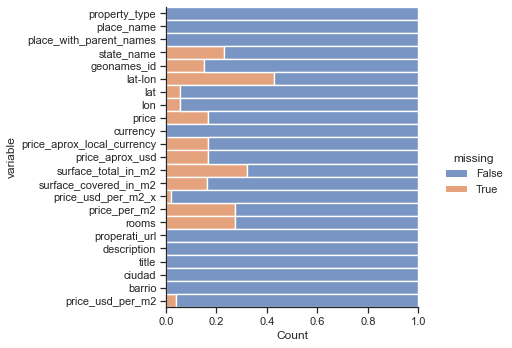

In [94]:
sns.color_palette("hls", 8)
sns.displot(data=data.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25)